In [1]:
#Importing necessary packages and libraries
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import recall_score
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/jeffreyng/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from nltk.tokenize import RegexpTokenizer
import re
import string
from nltk.stem import WordNetLemmatizer 

### Data Loading and Preprocessing

In [3]:
#scraped CSV into dataframe
df=pd.read_csv('file.csv')
df.shape

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(135742, 35)

In [4]:
df[df.language=='en'].to_csv('english_results.csv')

In [5]:
df1=pd.read_csv('LIWC_English_results.csv')

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,7,16,17,18,24,25,26,27,28,29,30,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.tweet

0         “Respect me to the utmost when you see me, tha...
1         Once read his interview, you may feel good  ht...
2         I feel that. Still hate some mf from middle sc...
3         #JeremyVine I feel the teachers and teaching a...
4         Well for me I told my mom that it was making m...
                                ...                        
135737    夕日を見てると不思議な気分になるよな~\n今日一日も無事終了！٩(*˙︶˙*)\n-\nI ...
135738    We feel so privileged to be able to share our ...
135739    スイカを食べるフロイド🍉\n多分、食べた事無いんだろうな…。\n\n#ツイステファンアート ...
135740    Life feels so much better when in a good space...
135741    (@x_GentleGiant_x)\n\nTass hasn’t expected to ...
Name: tweet, Length: 135742, dtype: object

In [6]:
data=df[df.language=='en']

In [15]:
data.tweet

0         “Respect me to the utmost when you see me, tha...
1         Once read his interview, you may feel good  ht...
2         I feel that. Still hate some mf from middle sc...
3         #JeremyVine I feel the teachers and teaching a...
4         Well for me I told my mom that it was making m...
                                ...                        
135734    Chilling out in #Ibiza is very easy. The inten...
135735    Never again.......but with the way things are ...
135738    We feel so privileged to be able to share our ...
135740    Life feels so much better when in a good space...
135741    (@x_GentleGiant_x)\n\nTass hasn’t expected to ...
Name: tweet, Length: 128006, dtype: object

In [8]:
df3=pd.concat([df1, data], axis=1 )

In [9]:
df3=df3[['username','Tone', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'tweet']]

In [16]:
df3.dropna().shape

(120768, 8)

In [17]:
#filtered out the threshold for sad score for depressed tweets
df3[df3.sad>20].tweet

51        I want to meet someone who makes me feel the w...
264       I feel you on that...  although Dressrosa had ...
1292      And thanks to the NHS shutting down, and STILL...
1595      Idk why but whenever i feel something ominous ...
1988      seeing people have tragic lives or do dumb thi...
                                ...                        
125286    It feels like you share a psychic bond with so...
125541    It feels like you share a psychic bond with so...
126821    See backing away and changing their mind is ok...
127217                         i feel sick to my stomach yo
127293                               I feel u bub ..... °~°
Name: tweet, Length: 255, dtype: object

In [18]:
#lowered the threshold for sad score
df3[df3.sad>15]

,username,Tone,posemo,negemo,anx,anger,sad,tweet
51,jordan67032671,1.00,0.0,33.33,0.0,0.0,33.33,I want to meet someone who makes me feel the w...
113,NaN,1.00,0.0,16.67,0.0,0.0,16.67,NaN
245,natekingsoul,1.00,0.0,16.67,0.0,0.0,16.67,Feels like just last week I was seeing ppl twe...
264,kwtfromnola,1.00,0.0,25.00,0.0,0.0,25.00,I feel you on that... although Dressrosa had ...
770,miyaslime,25.77,20.0,20.00,0.0,0.0,20.00,They make you feel like fucking shit and use “...
...,...,...,...,...,...,...,...,...
126821,_hiyahannah,1.00,0.0,27.27,0.0,0.0,27.27,See backing away and changing their mind is ok...
127217,shamiraplainly,1.00,0.0,25.00,0.0,0.0,25.00,i feel sick to my stomach yo
127293,jikooksdynamite,1.00,0.0,25.00,0.0,0.0,25.00,I feel u bub ..... °~°
127401,haven_4419,1.00,0.0,20.00,0.0,0.0,20.00,feel betrayed.. Feel useless and feel wanna cr...


In [19]:
lonely_data=df3

In [20]:
lonely_data= lonely_data[['username','Tone', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'tweet']]

In [21]:
final_data=lonely_data.dropna(axis=0)

In [22]:
#final working dataframe
final_data

,username,Tone,posemo,negemo,anx,anger,sad,tweet
0,cjthesmartguy,25.77,0.00,0.00,0.00,0.00,0.00,"“Respect me to the utmost when you see me, tha..."
1,sunny_1747,25.77,1.96,1.96,0.00,0.00,1.96,"Once read his interview, you may feel good ht..."
2,winterdownfall,98.87,5.88,0.00,0.00,0.00,0.00,I feel that. Still hate some mf from middle sc...
3,scousetilidie,1.00,0.00,10.00,0.00,10.00,0.00,#JeremyVine I feel the teachers and teaching a...
4,ashwxxn,1.00,0.00,6.90,3.45,0.00,0.00,Well for me I told my mom that it was making m...
...,...,...,...,...,...,...,...,...
128164,bitchaarie,1.00,2.27,6.82,0.00,2.27,2.27,Damn my ***** actually feels sad I’m not kiddi...
128166,valerie47728456,99.00,8.70,0.00,0.00,0.00,0.00,"of+a+steel+sky.+Somehow+Arthur+feels+very,+ver..."
128168,suzuacnh,99.00,15.69,0.00,0.00,0.00,0.00,"missed you too prin, i still feel sick 😔"
128169,sinnerykth,99.00,11.76,0.00,0.00,0.00,0.00,guess who made lockscreens after ages ? <3\n\n...


In [23]:
#creating stopword list
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', ' ', 'bizpacreview', 'ccya4ewhiyi' ,'8bkua22xbjnl']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 'u'
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter']
sw_list += [str(x) for x in range(150)]
sw_list += [int(x) for x in range(2)]
sw_set = set(sw_list)

In [24]:
#using tf_idf vectorizer
tfidf = TfidfVectorizer(stop_words=sw_set, ngram_range=(1,1), lowercase=True)
# tfidf_data_train_lem = tfidf.fit_transform()
answer = tfidf.fit_transform(final_data['tweet'])

In [25]:
answer

<120768x97031 sparse matrix of type '<class 'numpy.float64'>'
	with 1451372 stored elements in Compressed Sparse Row format>

In [26]:
#vectorizing the words of all the tweets
df_wordvec = pd.DataFrame(answer.todense(), columns = tfidf.get_feature_names())
df_wordvec

,00,000,0000000006,0001,00027,000exbmcoe,000ft,000th,000x,001,...,𝙬𝙤𝙧𝙡𝙙,𝙬𝙧𝙤𝙣𝙜,𝚊𝚗𝚘𝚗,𝚏𝚛𝚘𝚖,𝟐𝟎𝟎𝟖𝟐𝟔,𝟖𝟐𝟎𝟖𝟑𝟔𝟖𝟕𝟔𝟔,𝟗𝟏,𝟲𝟳𝟮𝟳𝟳,𝟴𝟴𝟮𝟰𝟰,𝟵𝟭
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Mapped Vader scores to integer counts for easier manipulation 
col         = 'sad'
conditions  = [ final_data[col] >= 5, (final_data[col] < 5)]
choices     = [ 1, 0 ]
final_data["target"] = np.select(conditions, choices, default=np.nan)            


/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


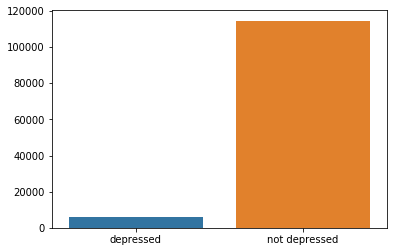

In [28]:
#class distribution count
sns.barplot(x=['depressed', 'not depressed'], y=[final_data['target'].value_counts()[1], final_data['target'].value_counts()[0]])
plt.savefig('DepressedClassBalance.png')

In [180]:
#function of the NLP process
def NLP_process(data):
    BoW=[]
    for word in data:
        BoW.append(word)
    word_bank= ' '.join(BoW)
    word_bank= word_bank.lower()
#     from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_tweets= tokenizer.tokenize(word_bank)

    sw_list = stopwords.words('english')
    sw_list += list(string.punctuation)
    sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', ' ', 'bizpacreview', 'ccya4ewhiyi' ,'8bkua22xbjnl']
    sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 'u'
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter']
    sw_list += [str(x) for x in range(150)]
    sw_list += [int(x) for x in range(2)]
    sw_set = set(sw_list)
    filtered_tweets=[]
    for word in tokenized_tweets:
        if word not in sw_set:
            filtered_tweets.append(word)
#     
    lemmatizer=WordNetLemmatizer()
    X_lemmatized_tweets=[]
    for w in filtered_tweets:
        X_lemmatized_tweets.append(lemmatizer.lemmatize(w))
    return (X_lemmatized_tweets)

In [181]:
z=NLP_process(final_data['tweet'])


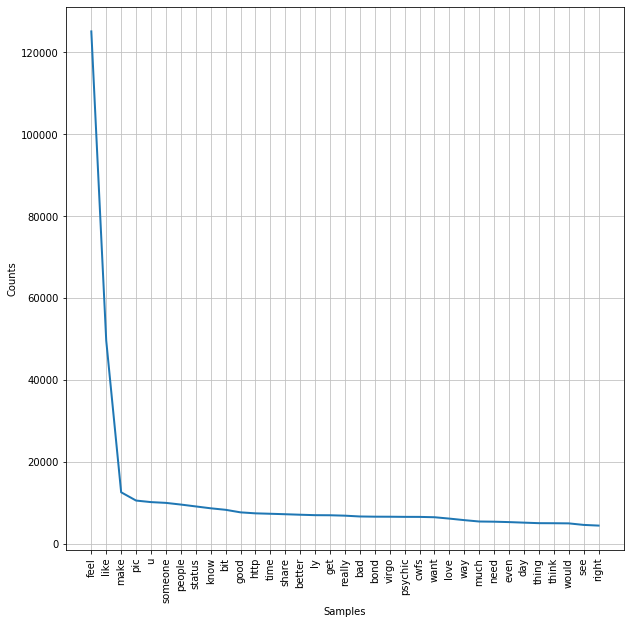

In [182]:
#frequency dist of most common words
fdist=FreqDist(z)
plt.figure(figsize=(10,10))
fdist.plot(35)

In [183]:
#getting all the sad tweets with 1.0 target
depressed=final_data[final_data['target']==1]
depressed

,username,Tone,posemo,negemo,anx,anger,sad,tweet,target
30,karinaursua,1.00,0.00,8.33,0.00,0.0,8.33,im drunk but not drunk feel me,1.0
38,peanut_crunch,2.30,5.41,8.11,0.00,0.0,8.11,Finishing #InfinityTrainBook3. We just saw Gr...,1.0
51,jordan67032671,1.00,0.00,33.33,0.00,0.0,33.33,I want to meet someone who makes me feel the w...,1.0
60,artnikay,99.00,15.00,5.00,5.00,0.0,5.00,"yep huhu writing on paper feels good, idk why ...",1.0
64,bettleroni1,1.00,0.00,14.29,0.00,0.0,14.29,I feel like I should go more often to the gym👀,1.0
...,...,...,...,...,...,...,...,...,...
127728,alaskafkngreen,25.77,5.56,5.56,0.00,0.0,5.56,you’ll always feel like my soulmate even if we...,1.0
127821,teamyoutube,25.77,6.25,6.25,0.00,0.0,6.25,Since you've already appealed the suspension o...,1.0
127872,aliraza00719,1.00,0.00,16.67,0.00,0.0,16.67,What did you feel if someone says same words t...,1.0
127896,melissa59060863,1.00,7.14,14.29,7.14,0.0,7.14,"I will teach you in time, but for now restrain...",1.0


In [184]:
#getting all the tweets with target = 0.0
not_depressed=final_data[final_data['target']==0]
not_depressed

,username,Tone,posemo,negemo,anx,anger,sad,tweet,target
0,cjthesmartguy,25.77,0.00,0.00,0.00,0.00,0.00,"“Respect me to the utmost when you see me, tha...",0.0
1,sunny_1747,25.77,1.96,1.96,0.00,0.00,1.96,"Once read his interview, you may feel good ht...",0.0
2,winterdownfall,98.87,5.88,0.00,0.00,0.00,0.00,I feel that. Still hate some mf from middle sc...,0.0
3,scousetilidie,1.00,0.00,10.00,0.00,10.00,0.00,#JeremyVine I feel the teachers and teaching a...,0.0
4,ashwxxn,1.00,0.00,6.90,3.45,0.00,0.00,Well for me I told my mom that it was making m...,0.0
...,...,...,...,...,...,...,...,...,...
128164,bitchaarie,1.00,2.27,6.82,0.00,2.27,2.27,Damn my ***** actually feels sad I’m not kiddi...,0.0
128166,valerie47728456,99.00,8.70,0.00,0.00,0.00,0.00,"of+a+steel+sky.+Somehow+Arthur+feels+very,+ver...",0.0
128168,suzuacnh,99.00,15.69,0.00,0.00,0.00,0.00,"missed you too prin, i still feel sick 😔",0.0
128169,sinnerykth,99.00,11.76,0.00,0.00,0.00,0.00,guess who made lockscreens after ages ? <3\n\n...,0.0


In [185]:
#NLP function on the sad tweets
a=NLP_process(depressed['tweet'])

In [186]:
#NLP function on the not sad tweets
b=NLP_process(not_depressed['tweet'])

In [187]:
#creating wordcloud
depressed = [item for sublist in a for item in sublist]
not_depressed = [item for sublist in b for item in sublist]

In [188]:
#beginning to get a word count dist. of teh two sets of tweets
depressed_list=FreqDist(a)
not_depressed_list=FreqDist(b)

In [189]:
#separated lists
depressed_list
not_depressed_list

FreqDist({'feel': 118745, 'like': 47092, 'make': 11896, 'pic': 10003, 'u': 9641, 'someone': 9431, 'people': 9092, 'status': 8593, 'know': 8177, 'bit': 7830, ...})

In [190]:
#creating two lists to be zipped into dictionary for wordcloud
not_depressed_bar_counts = [x[1] for x in not_depressed_list.most_common(50)]
not_depressed_bar_words = [x[0] for x in not_depressed_list.most_common(50)]

In [191]:
#created two lists to be zipped into dictionary for wordcloud
depressed_bar_counts = [x[1] for x in depressed_list.most_common(50)]
depressed_bar_words = [x[0] for x in depressed_list.most_common(50)]

In [192]:
NLP_process(final_data.tweet)

['respect',
 'utmost',
 'see',
 'feel',
 'fail',
 'told',
 'blockchain',
 'crypto',
 'even',
 'cpa',
 'study',
 'guide',
 'front',
 'page',
 'tax',
 'form',
 'seen',
 'coming',
 'tell',
 'read',
 'interview',
 'may',
 'feel',
 'good',
 'drrpnishank',
 'status',
 'feel',
 'still',
 'hate',
 'mf',
 'middle',
 'school',
 'jeremyvine',
 'feel',
 'teacher',
 'teaching',
 'assistant',
 'put',
 'terrible',
 'position',
 'primary',
 'school',
 'allowed',
 'wear',
 'ppe',
 'may',
 'scare',
 'child',
 'well',
 'told',
 'mom',
 'making',
 'feel',
 'empty',
 'tired',
 'done',
 'research',
 'decided',
 'go',
 'time',
 'year',
 'managed',
 'calm',
 'bc',
 'mental',
 'health',
 'issue',
 'cancelled',
 'waking',
 'feel',
 'like',
 'pic',
 'avuqmfptcd',
 'hand',
 'feel',
 'mum',
 'sonto',
 'unfair',
 'pretty',
 'ok',
 'like',
 'imagine',
 'jinyoung',
 'playing',
 'evil',
 'role',
 'gonna',
 'rock',
 'already',
 'feel',
 'hug',
 'make',
 'feel',
 'better',
 'feel',
 'fvcking',
 'amazing',
 'wired',
 'th

In [194]:
final_data

,username,Tone,posemo,negemo,anx,anger,sad,tweet,target
0,cjthesmartguy,25.77,0.00,0.00,0.00,0.00,0.00,"“Respect me to the utmost when you see me, tha...",0.0
1,sunny_1747,25.77,1.96,1.96,0.00,0.00,1.96,"Once read his interview, you may feel good ht...",0.0
2,winterdownfall,98.87,5.88,0.00,0.00,0.00,0.00,I feel that. Still hate some mf from middle sc...,0.0
3,scousetilidie,1.00,0.00,10.00,0.00,10.00,0.00,#JeremyVine I feel the teachers and teaching a...,0.0
4,ashwxxn,1.00,0.00,6.90,3.45,0.00,0.00,Well for me I told my mom that it was making m...,0.0
...,...,...,...,...,...,...,...,...,...
128164,bitchaarie,1.00,2.27,6.82,0.00,2.27,2.27,Damn my ***** actually feels sad I’m not kiddi...,0.0
128166,valerie47728456,99.00,8.70,0.00,0.00,0.00,0.00,"of+a+steel+sky.+Somehow+Arthur+feels+very,+ver...",0.0
128168,suzuacnh,99.00,15.69,0.00,0.00,0.00,0.00,"missed you too prin, i still feel sick 😔",0.0
128169,sinnerykth,99.00,11.76,0.00,0.00,0.00,0.00,guess who made lockscreens after ages ? <3\n\n...,0.0


In [42]:
#creating the wordcloud from dictionary
from wordcloud import WordCloud
D_dictionary = dict(zip(depressed_bar_words, depressed_bar_counts))
ND_dictionary = dict(zip(not_depressed_bar_words, not_depressed_bar_counts))

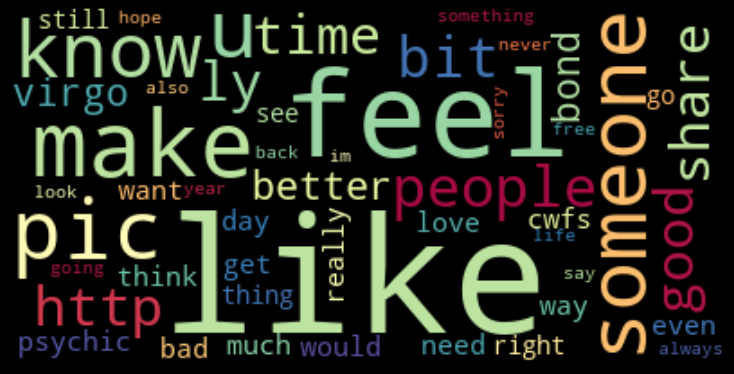

In [43]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(D_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('Dep_Wcloud.png')
#Uncomment above line to save image

plt.show()

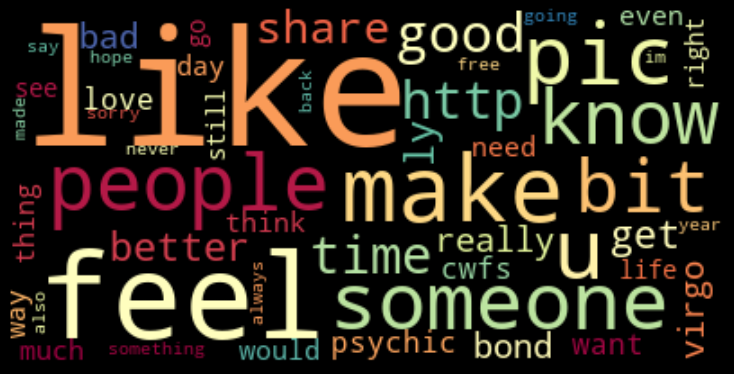

In [44]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(ND_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('Dep_Wcloud.png')
# uncomment above line to save wordcloud


plt.show()

In [39]:
answer

<120768x97072 sparse matrix of type '<class 'numpy.float64'>'
	with 1452030 stored elements in Compressed Sparse Row format>

In [195]:
#setting the X,y variable to be train test split but first we need to resample for class imbalance
X=NLP_process(final_data['tweet'])
y=final_data['target']

In [196]:
#since there is huge class imbalance, we resample the maj/min
from sklearn.utils import resample

In [197]:
#naming our majority and minority classes
df_majority = final_data[final_data.target==0]
df_minority = final_data[final_data.target==1]
 

In [198]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=114580,    # to match majority class
                                 random_state=0) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()


1.0    114580
0.0    114580
Name: target, dtype: int64

In [199]:
final_data.target.value_counts()

0.0    114580
1.0      6188
Name: target, dtype: int64

In [200]:
#X,y corrected for class imbalance
y = df_upsampled.target
X = df_upsampled.tweet

In [201]:
#train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.25, random_state=23)

In [202]:
X_test

31567                                   Feel better sweetie
119765    I can see why that might be one area that we s...
109597                    Poles? I thought it was Russians?
62650             Ryan is getting paid, he feels just fine.
99912                  I know they gonna play I can feel it
                                ...                        
17602                                   Soft and i feel you
73091     I don't know if I should laugh or feel sad for...
7148      Sis! I’ve been cheesingggg. This is what true ...
81264       My skin hates me.. feel like a damn teenager! 😩
62722     I’m sorry, my funding is drained for the next ...
Name: tweet, Length: 57290, dtype: object

In [145]:
#Using countvectorizer
vectorizer = CountVectorizer(stop_words=sw_set, ngram_range=(1,1), lowercase=True)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)
X_train_tf

<171870x81528 sparse matrix of type '<class 'numpy.int64'>'
	with 2067032 stored elements in Compressed Sparse Row format>

In [146]:
df_wordvec_tf = pd.DataFrame(X_test_tf.todense(), columns = vectorizer.get_feature_names())
datas1=df_wordvec_tf.columns

In [147]:
df_wordvec_tf

,00,000,0000000006,0001,00027,000exbmcoe,000ft,000th,000x,001,...,𝙩𝙝𝙖𝙩,𝙩𝙧𝙪𝙚,𝙬𝙤𝙧𝙡𝙙,𝙬𝙧𝙤𝙣𝙜,𝟐𝟎𝟎𝟖𝟐𝟔,𝟖𝟐𝟎𝟖𝟑𝟔𝟖𝟕𝟔𝟔,𝟗𝟏,𝟲𝟳𝟮𝟳𝟳,𝟴𝟴𝟮𝟰𝟰,𝟵𝟭
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
#importing log_reg model
from sklearn.linear_model import LogisticRegression

In [149]:
#instantiating log_reg model
log_clf_tf = LogisticRegression(penalty='l2', n_jobs=-1, random_state=0, class_weight='balanced', C=10, solver='saga')

In [150]:
#fitting model
log_clf_tf.fit(X_train_tf, y_train)

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, class_weight='balanced', n_jobs=-1, random_state=0,
                   solver='saga')

In [151]:
#predicting model
log_y_preds_tf=log_clf_tf.predict(X_test_tf)

In [152]:
#accuracy, f1, and recall score
print(accuracy_score(y_test, log_y_preds_tf))
print(f1_score(y_test, log_y_preds_tf, average='macro'))
print(recall_score(y_test, log_y_preds_tf, average='macro'))

0.8386105777622622
0.8382881850714055
0.8386582597545718


In [69]:
#translating the log_reg_coefficients into something interpretable (Hartleys) 
import math
log=[]
for ele in log_clf_tf.coef_:
    for x in ele:
        log.append(x)
hartleys=[np.log10((1/1-j)) for j in log]

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


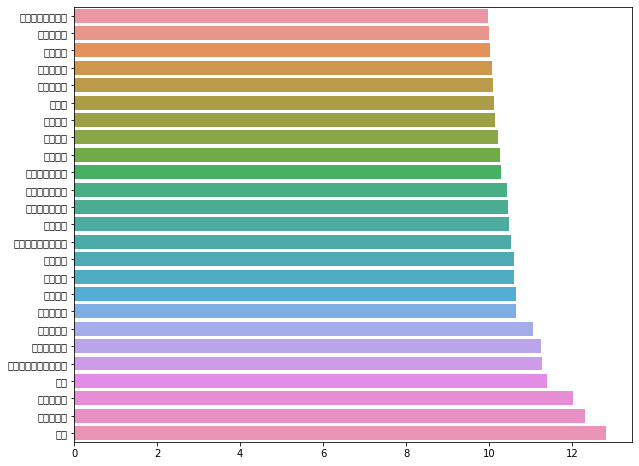

In [231]:
#failed to get column names
features, ax = plt.subplots(figsize=(10,8))
sns.barplot(y = np.sort(df_wordvec_tf.columns[-25:]), x = np.sort(log)[-25: ])

In [230]:
print(np.sort(df_wordvec_tf.columns[-25:]))

['𝘽𝙍𝙄𝙏𝙃𝘿𝘼𝙔' '𝘿𝙔𝙇𝘼𝙉' '𝙂𝙊𝙊𝘿' '𝙃𝘼𝙋𝙋𝙔' '𝙄𝙉𝘿𝙄𝘼' '𝙅𝙀𝙀' '𝙆𝙋𝙊𝙋' '𝙉𝙀𝙀𝙏' '𝙉𝙊𝙏𝙀'
 '𝙋𝙍𝙀𝙁𝘼𝘾𝙀' '𝙒𝘼𝙍𝙉𝙄𝙉𝙂' '𝙚𝙭𝙖𝙘𝙩𝙡𝙮' '𝙝𝙤𝙥𝙚' '𝙧𝙚𝙡𝙪𝙘𝙩𝙖𝙣𝙩' '𝙨𝙥𝙤𝙩' '𝙩𝙝𝙖𝙩' '𝙩𝙧𝙪𝙚'
 '𝙬𝙤𝙧𝙡𝙙' '𝙬𝙧𝙤𝙣𝙜' '𝟐𝟎𝟎𝟖𝟐𝟔' '𝟖𝟐𝟎𝟖𝟑𝟔𝟖𝟕𝟔𝟔' '𝟗𝟏' '𝟲𝟳𝟮𝟳𝟳' '𝟴𝟴𝟮𝟰𝟰' '𝟵𝟭']


In [70]:

import math

odds=[(math.log10(abs(t))) for t in hartleys]
print(odds)

[-0.7367365807849041, -0.722982073714992, -1.3823214098608108, -1.3184461548244897, -2.071445242342922, -1.3091766222268653, -0.8966732651401333, -1.4239686878442617, -1.137027064334217, -0.2955608085653479, -0.42148057812144907, -1.1518849496079129, -1.6906220836066363, -2.225414618516343, -1.6906220836066363, -1.6906220836066363, -1.7259091282987318, -1.3443721459632472, -1.6906220836066363, -1.6906220836066363, -1.6906220836066363, -1.6906220836066363, -1.8495929604359067, -1.3643496384473766, nan, -1.223219475133881, -1.5256309591532187, -1.0061915730285298, -1.3043718099014212, -1.4255855904453827, -1.6601949477651168, -1.294985009196075, -0.8394583264135532, -0.21226046775431626, -1.89831358010502, -1.3134594108245798, -2.122985738134315, -1.3716609204604555, -1.6906220836066363, -1.3940185585073441, -0.9160857373342134, -1.5873423158634117, -1.0567991275161785, -1.2048093757011138, -0.9719974077535943, -2.031108399612339, -2.0789615058610216, nan, -1.5920094271987995, -0.9199750

In [74]:
logz=pd.DataFrame(log).T

In [75]:
odds= pd.DataFrame([round(x,4) for x in odds]).T

In [76]:
odds.T


,0
0,-0.7367
1,-0.7230
2,-1.3823
3,-1.3184
4,-2.0714
...,...
81523,-1.9450
81524,-1.9450
81525,-2.2833
81526,-2.2833


In [79]:
b

['respect',
 'utmost',
 'see',
 'fail',
 'told',
 'blockchain',
 'crypto',
 'even',
 'cpa',
 'study',
 'guide',
 'front',
 'page',
 'tax',
 'form',
 'seen',
 'coming',
 'tell',
 'read',
 'interview',
 'may',
 'good',
 'drrpnishank',
 'still',
 'hate',
 'mf',
 'middle',
 'school',
 'jeremyvine',
 'teacher',
 'teaching',
 'assistant',
 'put',
 'terrible',
 'position',
 'primary',
 'school',
 'allowed',
 'wear',
 'ppe',
 'may',
 'scare',
 'child',
 'well',
 'told',
 'mom',
 'making',
 'empty',
 'tired',
 'done',
 'research',
 'decided',
 'go',
 'time',
 'year',
 'managed',
 'calm',
 'bc',
 'mental',
 'health',
 'issue',
 'cancelled',
 'waking',
 'feel',
 'like',
 'pic',
 'avuqmfptcd',
 'hand',
 'mum',
 'sonto',
 'unfair',
 'pretty',
 'ok',
 'like',
 'imagine',
 'jinyoung',
 'playing',
 'evil',
 'role',
 'gonna',
 'rock',
 'already',
 'hug',
 'make',
 'better',
 'fvcking',
 'amazing',
 'wired',
 'think',
 'going',
 'workout',
 'write',
 'khalid',
 'ibn',
 'walid',
 'rh',
 'bangla',
 'lol',

In [77]:
z=odds.sort_values(by=[0], ascending= True)[0:100]


In [86]:
y=b.sort()
print(y)

None


In [88]:
#using tf_idf vectorizer
tfidf = TfidfVectorizer(stop_words=sw_set, ngram_range=(1,1), lowercase=True)
# tfidf_data_train_lem = tfidf.fit_transform()
# X_b = tfidf.fit_transform(X)
# X_test_b=tfidf.transform(X_test)

In [203]:
#train, test, split
y = df_upsampled.target
X = df_upsampled.tweet
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.20, random_state=0)

In [204]:
X_train_tfidf= tfidf.fit_transform(X_train)
X_test_tfidf= tfidf.transform(X_test)
X_train_tfidf

<183328x85073 sparse matrix of type '<class 'numpy.float64'>'
	with 2206154 stored elements in Compressed Sparse Row format>

In [205]:
df_wordvec = pd.DataFrame(X_test_tfidf.todense(), columns = tfidf.get_feature_names())
datas=df_wordvec.columns

In [206]:
df_wordvec

,00,000,0000000006,00027,000exbmcoe,000ft,001,001mm,001st,00291570,...,𝙨𝙥𝙤𝙩,𝙩𝙝𝙖𝙩,𝙬𝙤𝙧𝙡𝙙,𝙬𝙧𝙤𝙣𝙜,𝟐𝟎𝟎𝟖𝟐𝟔,𝟖𝟐𝟎𝟖𝟑𝟔𝟖𝟕𝟔𝟔,𝟗𝟏,𝟲𝟳𝟮𝟳𝟳,𝟴𝟴𝟮𝟰𝟰,𝟵𝟭
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
y_train.value_counts()

0.0    91665
1.0    91663
Name: target, dtype: int64

In [158]:
rfc=RandomForestClassifier(n_estimators=1000, max_depth=6, n_jobs=-1, random_state=0, class_weight='balanced')

In [159]:
rfc.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=1000,
                       n_jobs=-1, random_state=0)

In [160]:
y_preds=rfc.predict(X_test_tfidf)

In [161]:
rfc_acc_score= accuracy_score(y_test, y_preds)


In [162]:
rfc_acc_score


0.6247381742014313

In [163]:
rfc_f1_score= f1_score(y_test, y_preds, average='macro')
rfc_f1_score

0.622013837732064

In [164]:
from sklearn.metrics import recall_score
recall_score(y_test, y_preds, average='macro')


0.6247418800958913

In [165]:
# from sklearn import svm
# SVMclf = svm.SVC(class_weight='balanced')

In [166]:
# SVMclf.fit(X_train_tfidf, y_train)

In [167]:
# svm_y_preds=clf.predict(X_test_tfidf)

In [168]:
# print(accuracy_score(y_test, svm_y_preds))
# print(f1_score(y_test, svm_y_preds, average='macro'))
# print(recall_score(y_test, svm_y_preds, average='macro'))

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
log_clf = LogisticRegression(penalty='l2', n_jobs=-1, random_state=0, class_weight='balanced', C=10, solver='saga')

In [210]:
log_clf.fit(X_train_tfidf, y_train)

LogisticRegression(C=10, class_weight='balanced', n_jobs=-1, random_state=0,
                   solver='saga')

In [211]:
log_y_preds=log_clf.predict(X_test_tfidf)

In [212]:
print(accuracy_score(y_test, log_y_preds))
print(f1_score(y_test, log_y_preds, average='macro'))
print(recall_score(y_test, log_y_preds, average='macro'))

0.8552103333915169
0.8543274777167003
0.8552069378504872


In [213]:
log=[]
for ele in log_clf.coef_:
    for x in ele:
        log.append(x)
log

[1.7139459899616691,
 0.5285154711450262,
 -0.05539450581290139,
 -0.3085968738367277,
 -0.2619964241379731,
 -1.0267643327016578,
 2.3543024765392264,
 2.270492236497949,
 -0.24508603898192652,
 -0.0746476102651122,
 -0.015615608652759787,
 -0.0709345414929071,
 -0.0746476102651122,
 -0.0746476102651122,
 -0.1247014335869524,
 -0.7057798370430797,
 -0.0746476102651122,
 -0.28903542918676695,
 -0.9780512861866058,
 -0.0746476102651122,
 -0.0746476102651122,
 -0.0746476102651122,
 -0.1448350380510349,
 -0.12701762979738518,
 -0.7952254734905821,
 3.827757163817808,
 -0.34266400681850717,
 -0.022952531986475063,
 -0.06778746915264043,
 -0.528658312689641,
 -0.3333965969026981,
 -0.2660920111220647,
 -0.11191670234441851,
 1.4232554921717495,
 -0.30632272536284255,
 -7.301093836051494,
 -0.10583487853572435,
 -0.20666039489477658,
 -0.023225001875653312,
 -0.3867973614765756,
 -0.0746476102651122,
 -0.2570593649390037,
 -0.599568729348317,
 -0.8551958837988665,
 -0.08723111071806942,
 -0.

In [214]:
len(log)

85073

In [215]:
y_train

79848     1.0
56481     1.0
44079     1.0
43327     1.0
113740    0.0
         ... 
7590      1.0
55022     1.0
54435     1.0
49002     0.0
42631     1.0
Name: target, Length: 183328, dtype: float64

In [216]:
logreg_coefficients=dict(zip(df_wordvec.columns, log))

In [235]:
logreg_coefficients
logreg_dict={k: v for k, v in sorted(logreg_coefficients.items(), key=lambda item: item[1])}
logreg_graph=list(logreg_dict.items())
logreg_dict

{'poses': -10.13911025862092,
 'asian': -8.298266903642123,
 'chat': -8.051349695829137,
 'violated': -7.981765963126599,
 'neutral': -7.818460939072303,
 'push': -7.594666560920109,
 'constitution': -7.53617042065265,
 'asks': -7.4601221627444065,
 'racial': -7.449775133419657,
 'bullying': -7.432665659396355,
 '01': -7.301093836051494,
 'unhappy': -7.236673129172699,
 'voting': -7.229799835511653,
 'faster': -7.2204021510462475,
 'earn': -7.054190258394593,
 'entertainment': -6.98030702694088,
 'zoom': -6.905294501375317,
 'congrats': -6.824110889960043,
 'incredibly': -6.791329633225342,
 'immediately': -6.749394911464133,
 'planning': -6.6917695506777966,
 'badly': -6.684089964760675,
 'bay': -6.684080663722905,
 'heartless': -6.661925519122249,
 'ignorant': -6.643462446576785,
 'mindset': -6.6294389509044995,
 'magic': -6.604276386684893,
 'sickening': -6.603528764370568,
 'silence': -6.597975850759,
 'isolated': -6.570754499390162,
 'wasnt': -6.491251993844168,
 'parts': -6.48885

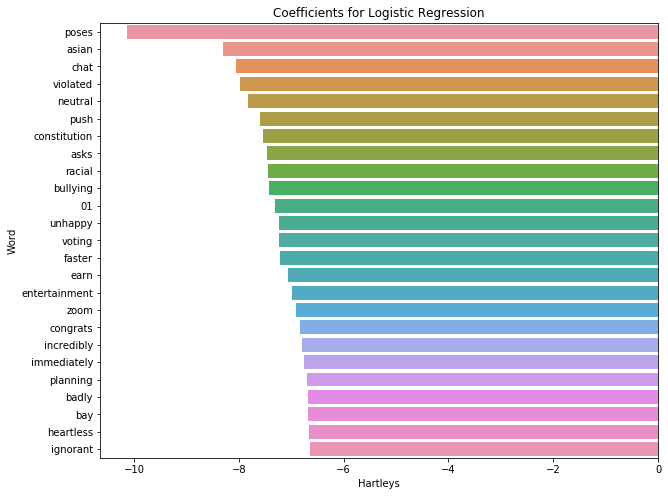

In [236]:
features, ax = plt.subplots(figsize=(10,8))
sns.barplot(y= [y[0] for y in logreg_graph[0:25]], x= [x[1] for x in logreg_graph[0:25]])
ax.set(title='Coefficients for Logistic Regression')
plt.xlabel('Hartleys')
plt.ylabel('Word')
features.savefig('LogRegCoef_.png')

[Text(0.5, 1.0, 'Feature importances to model')]

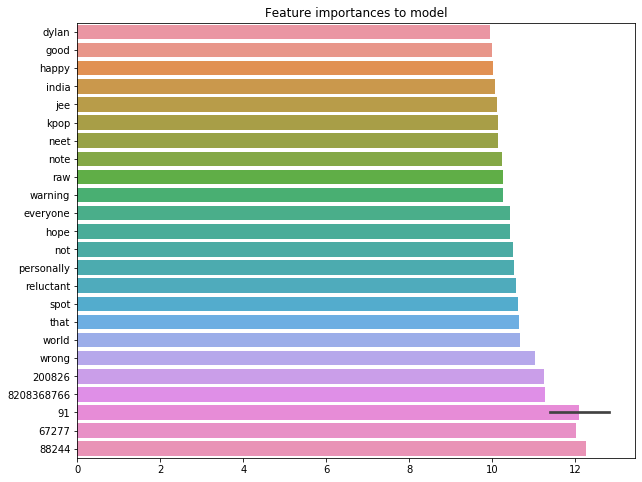

In [160]:
# def plot_feature_importances(model):
#     n_features = X_train_tfidf.shape[1]
#     plt.figure(figsize=(8,8))
#     plt.barh(range(n_features), log_clf.coef_, align='center') 
#     plt.yticks(np.arange(n_features), df_wordvec.columns.values) 
#     plt.xlabel('Feature importance')
#     plt.ylabel('Feature')
    

features, ax = plt.subplots(figsize=(10,8))
sns.barplot( y=['dylan', 'good', 'happy', 'india', 'jee', 'kpop', 'neet', 'note',
       'raw', 'warning', 'everyone', 'hope', 'not', 'personally',
       'reluctant', 'spot', 'that', 'world', 'wrong', '200826',
       '8208368766', '91', '67277', '88244', '91'], x=np.sort(log)[-25: ])
ax.set(title='Feature importances to model')
# plot_feature_importances(log_clf)

In [98]:
print(log_clf.coef_)
print(log_clf.intercept_)

[[ 1.7176854   0.5698996  -0.06284221 ... -0.03672207 -0.03672207
  -0.03672207]]
[-2.28075945]


In [219]:
lr_ex_coef = np.exp(log_clf.coef_)

In [220]:
probs = [x for x in lr_ex_coef]

In [221]:
coefficient_probabilities =pd.DataFrame(data=probs, columns=df_wordvec.columns)

In [222]:
coefficient_probabilities

,00,000,0000000006,00027,000exbmcoe,000ft,001,001mm,001st,00291570,...,𝙨𝙥𝙤𝙩,𝙩𝙝𝙖𝙩,𝙬𝙤𝙧𝙡𝙙,𝙬𝙧𝙤𝙣𝙜,𝟐𝟎𝟎𝟖𝟐𝟔,𝟖𝟐𝟎𝟖𝟑𝟔𝟖𝟕𝟔𝟔,𝟗𝟏,𝟲𝟳𝟮𝟳𝟳,𝟴𝟴𝟮𝟰𝟰,𝟵𝟭
0,5.550822,1.696412,0.946112,0.734477,0.769514,0.358164,10.530781,9.684167,0.782637,0.92807,...,0.863445,0.863445,0.765904,0.460986,0.975751,0.897611,0.897611,0.963993,0.963993,0.963993


In [223]:
len(data)

128006

In [224]:
from sklearn.naive_bayes import MultinomialNB
NBclf = MultinomialNB(alpha=.20)


In [225]:
NBclf.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.2)

In [226]:
NBclf_y_preds=NBclf.predict(X_test_tfidf)

In [227]:
print(accuracy_score(y_test, NBclf_y_preds))
print(f1_score(y_test, NBclf_y_preds, average='macro'))
print(recall_score(y_test, NBclf_y_preds, average='macro'))

0.7982632222028277
0.7943326288477572
0.7982571910810093


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
marked_text = ["[CLS]" + tweet + "[SEP]" for tweet in final_data.tweet]
type(marked_text[0])

In [ ]:
tokenized_text=[tokenizer.tokenize(marked_text[i]) for i in range(120768)]


In [ ]:
len(tokenized_text)

In [ ]:
segments_ids = [1] * len(marked_text)


In [ ]:
indexed_tokens = [tokenizer.convert_tokens_to_ids(tokenized_text[i]) for i in range(120768)]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
t=indexed_tokens

In [ ]:
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    t, padding="post")

In [ ]:
tokens_tensor = torch.tensor([padded_inputs])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

In [ ]:
tokens_tensor = torch.tensor(tokens_tensor).to(torch.int64).long()

In [ ]:
# with torch.no_grad():
outputs = model(tokens_tensor, segments_tensors)
